In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [59]:
# File to Load (Remember to change these)
ride_data_to_load = "data/ride_data.csv"
city_data_to_load = "data/city_data.csv"

In [60]:
# Read the City Data
city_data_to_read = pd.read_csv("data/city_data.csv")
city_data_to_read.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [61]:
#TOTAL DRIVERS BY CITY TYPE
total_drivers = city_data_to_read['driver_count'].sum
total_drivers()

2973

In [62]:
# Read the Ride Data
ride_data_to_read = pd.read_csv("data/ride_data.csv")
ride_data_to_read.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [63]:
#TOTAL Rides BY CITY TYPE
total_rides = ride_data_to_read["ride_id"].count()
total_rides

2375

In [64]:
#TOTAL fares
total_fares = ride_data_to_read["fare"].sum()
total_fares

63538.64

In [65]:
merge_df = pd.merge(ride_data_to_read, city_data_to_read, how='left', on="city")
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [66]:
merge_type = merge_df.groupby('type')

In [67]:
city_ride_totals = merge_type['ride_id'].count()
city_ride_totals

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [68]:
city_fare_totals = merge_type['fare'].sum()
city_fare_totals

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [105]:
type_df = merge_df.groupby(['type', 'city'])

In [70]:
rural_df = merge_df.loc[merge_df["type"] == "Rural", :]

In [71]:
rural_city_df = rural_df.groupby('city')

In [96]:
rural_average_fares = rural_city_df["fare"].mean()

In [97]:
rural_total_rides = rural_city_df["ride_id"].count()

In [98]:
rural_total_drivers = rural_city_df["driver_count"].mean()

In [75]:
urban_df = merge_df.loc[merge_df["type"] == "Urban", :]

In [76]:
urban_city_df = urban_df.groupby('city')

In [99]:
urban_average_fares = urban_city_df["fare"].mean()

In [100]:
urban_total_rides = urban_city_df["ride_id"].count()

In [101]:
urban_total_drivers = urban_city_df["driver_count"].mean()

In [80]:
suburban_df = merge_df.loc[merge_df["type"] == "Suburban", :]

In [81]:
suburban_city_df = suburban_df.groupby('city')

In [102]:
suburban_average_fares = suburban_city_df["fare"].mean()

In [103]:
suburban_total_rides = suburban_city_df["ride_id"].count()

In [104]:
suburban_total_drivers = suburban_city_df["driver_count"].mean()

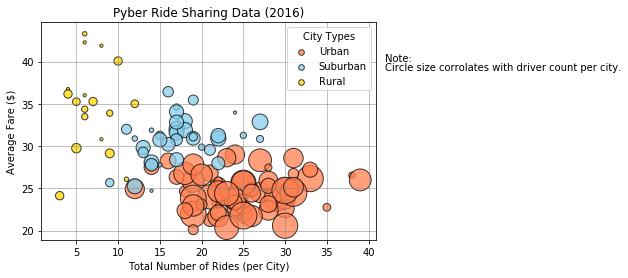

In [85]:
plt.scatter(urban_total_rides, urban_average_fares,s=urban_total_drivers*10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.75, label="Urban")

plt.scatter(suburban_total_rides, suburban_average_fares,s=suburban_total_drivers*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.75, label="Suburban")

plt.scatter(rural_total_rides, rural_average_fares,s=rural_total_drivers*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.75, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
legend = plt.legend(loc="upper right", title ="City Types", scatterpoints = 1, markerscale= .75)
legend.legendHandles[0]._sizes = [32]
legend.legendHandles[1]._sizes = [32]
legend.legendHandles[2]._sizes = [32]
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.text(42,40,"Note:")
plt.text(42,39,"Circle size corrolates with driver count per city.")
plt.show()

In [106]:
# Save Figure
plt.savefig('Pyber Ride Sharing Data 2016.png')

<Figure size 432x288 with 0 Axes>

In [86]:
#TOTAL Fares % by City Type - Pie Chart 
percentage_rural_fares = 4327.93/total_fares*100
percentage_suburban_fares = 19356.33/total_fares*100
percentage_urban_fares = 39854.38/total_fares*100

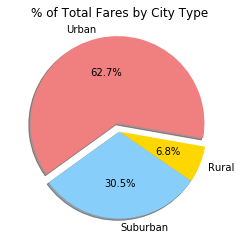

<Figure size 432x288 with 0 Axes>

In [87]:
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [percentage_urban_fares, percentage_suburban_fares,percentage_rural_fares]

# The colors of each section of the pie chart
colors = ["lightcoral","lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=350)

plt.title("% of Total Fares by City Type")
plt.show()
plt.tight_layout()

In [88]:
# Save Figure
plt.savefig('Percentage of Total Fares by City Type.png')

<Figure size 432x288 with 0 Axes>

In [89]:
#TOTAL RIDES % by City Type - Pie Chart 
percentage_rural_rides = 125/total_rides*100
percentage_suburban_rides = 625/total_rides*100
percentage_urban_rides = 1625/total_rides*100

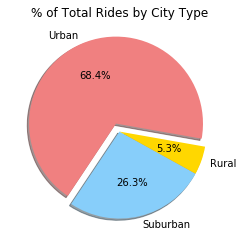

<Figure size 432x288 with 0 Axes>

In [90]:
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [percentage_urban_rides,percentage_suburban_rides,percentage_rural_rides]

# The colors of each section of the pie chart
colors = ["lightcoral","lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

#Create Pie Chart 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=350)

plt.title("% of Total Rides by City Type")
plt.show()
plt.tight_layout()

In [91]:
#Save plot 
plt.savefig('Percentage of Total Rides by City Type.png')

<Figure size 432x288 with 0 Axes>

In [93]:
# TOTAL Drivers % by City Type
# Calculate Driver Percents
percentage_rural_drivers = 78/2973*100
percentage_suburban_drivers = 490/2973*100
percentage_urban_drivers = 2405/2973*100

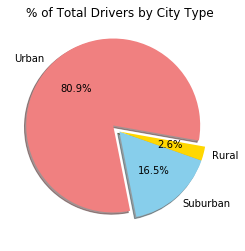

<Figure size 432x288 with 0 Axes>

In [94]:
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [percentage_urban_drivers,percentage_suburban_drivers,percentage_rural_drivers]

# The colors of each section of the pie chart
colors = ["lightcoral","skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

#Create Pie Chart 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=350)

plt.title("% of Total Drivers by City Type")
plt.show()
plt.tight_layout()

In [95]:
#Save plot 
plt.savefig('Percentage of Total Drivers by City Type.png')

<Figure size 432x288 with 0 Axes>